In [1]:
# Logistic Regression with BankChurn.csv and statsmodels library 

In [2]:
# BankChurn.csv dataset is in the folder C:\Users\jason\OneDrive\Documents\MBAD 6211 

In [3]:
#Import the os library to use file and folder methods
import os

In [4]:
# view the current working directory
os.getcwd()

'C:\\Users\\jason'

In [5]:
os.getcwd()

'C:\\Users\\jason'

In [6]:
#import necessary libraries for problem solving
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
# read data from Organics.csv into a dataframe
file_path = r'C:\Users\jason\OneDrive\Documents\MBAD 6211 LAST SEMESTER\bankchurn.csv'
data = pd.read_csv(file_path)

In [8]:
# examine the dataframe's characteristics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           9994 non-null   object 
 3   gender            9993 non-null   object 
 4   age               9999 non-null   float64
 5   tenure            9998 non-null   float64
 6   balance           6383 non-null   float64
 7   products_number   9995 non-null   float64
 8   credit_card       9998 non-null   float64
 9   active_member     9999 non-null   float64
 10  estimated_salary  9998 non-null   float64
 11  churn             10000 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 937.6+ KB


In [9]:
# count the rows with missing values
data.isnull().sum()

customer_id            0
credit_score           0
country                6
gender                 7
age                    1
tenure                 2
balance             3617
products_number        5
credit_card            2
active_member          1
estimated_salary       2
churn                  0
dtype: int64

In [10]:
# drop rows with missing values
data_nonull = data.dropna()
data_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 1 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       6377 non-null   int64  
 1   credit_score      6377 non-null   int64  
 2   country           6377 non-null   object 
 3   gender            6377 non-null   object 
 4   age               6377 non-null   float64
 5   tenure            6377 non-null   float64
 6   balance           6377 non-null   float64
 7   products_number   6377 non-null   float64
 8   credit_card       6377 non-null   float64
 9   active_member     6377 non-null   float64
 10  estimated_salary  6377 non-null   float64
 11  churn             6377 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 647.7+ KB


In [11]:
data_nonull = data_nonull.drop(["customer_id"], axis = 1)
data_nonull.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,608,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
4,850,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
5,645,Spain,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1
7,376,Germany,Female,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1


In [12]:
# us pd.getdummies() method to create the dummy columns
# make sure to set parameter dtype = int.
data_nonull = pd.get_dummies(data_nonull, dtype = int)
data_nonull

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
1,608,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0,0,0,1,1,0
2,502,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1,1,0,0,1,0
4,850,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0,0,0,1,1,0
5,645,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1,0,0,1,0,1
7,376,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,597,53.0,4.0,88381.21,1.0,1.0,0.0,69384.71,1,1,0,0,1,0
9993,644,28.0,7.0,155060.41,1.0,1.0,0.0,29179.52,0,1,0,0,0,1
9996,516,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0,1,0,0,0,1
9998,772,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1,0,1,0,0,1


In [13]:
# make y (dependent variable) as np.array
y = np.array(data_nonull["churn"])

# make x a dataframe subset with independent variables
x = data_nonull.drop("churn", axis=1)


In [14]:
# split the dataset into training and testing
# since random sampling is used, set the random seed to a fixed value
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 44)

In [15]:
# Decision tree with gini index
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier using Gini index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
clf_gini.fit(X_train, y_train)

# Predict the responses for test dataset
y_pred_dt = clf_gini.predict(X_test)

In [16]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_dt)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)

# Print accuracy, and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.7445141065830722

Confusion Matrix:
 [[1172  297]
 [ 192  253]]


In [17]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Model predictions
y_pred_rf = clf.predict(X_test)

In [18]:
# Calculate accuracy of Random Forest
accuracy = metrics.accuracy_score(y_test, y_pred_rf)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)

# Print accuracy, and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.8396029258098223

Confusion Matrix:
 [[1391   78]
 [ 229  216]]


In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd

from datetime import datetime
print("Start search time:", datetime.now())

# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the model
rf = RandomForestClassifier()

# Instantiate the GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)

# Evaluate the model
y_pred = grid_search.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", conf_matrix)

Start search time: 2024-02-22 22:56:22.046903
Accuracy: 0.8448275862068966

Confusion Matrix:
 [[1391   78]
 [ 229  216]]


In [20]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

from datetime import datetime
print("Start search time:", datetime.now())

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Model predictions
y_pred_rf = clf.predict(X_test)

# Calculate accuracy of Random Forest
accuracy = metrics.accuracy_score(y_test, y_pred_rf)

# Calculate confusion matrixOpt
conf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)

# Print accuracy, and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

Start search time: 2024-02-22 23:03:59.651570

Accuracy: 0.835423197492163

Confusion Matrix:
 [[1387   82]
 [ 233  212]]


Start search time: 2024-02-22 23:04:00.514379
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}
Best estimator: RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=300,
                       random_state=10)
Feature importance: [0.0638148  0.36890072 0.03571292 0.09823979 0.20277916 0.00851014
 0.06306899 0.06857978 0.01547381 0.03697048 0.00914707 0.01372482
 0.01507752]
End search time: 2024-02-22 23:05:09.224457

Accuracy: 0.8458725182863114


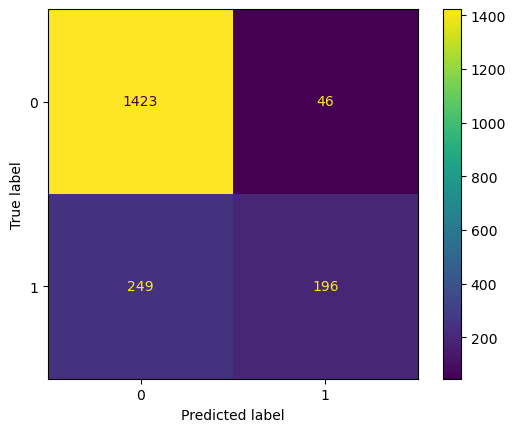

In [21]:
# Random Forest - Fine tuning with GridSearchCV
# using datetime to time the fine tuning process
from datetime import datetime
print("Start search time:", datetime.now())

from sklearn.ensemble import RandomForestClassifier

# find the best parameters 
from sklearn.model_selection import GridSearchCV

# RF -- Tunning parameters 
# Define the parameter grid
param = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [4, 6, 8],  # Maximum number of levels in tree
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
} 

RF = RandomForestClassifier(random_state=10)

# search parameters: cv=cross validation blocks; verbose=higher value show more steps
# n_jobs=-1 uses all available CPU cores; 
grid = GridSearchCV(estimator=RF, 
                    param_grid=param,
                    scoring="accuracy",
                    verbose=1, cv=3)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

print("Best estimator:", grid.best_estimator_)

print("Feature importance:", grid.best_estimator_.feature_importances_)

# end grid search
print("End search time:", datetime.now())

# confusion matrix 

final_model_rf = grid.best_estimator_

y_pred = final_model_rf.predict(X_test)

# get accuracy and confusion matrix
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_test,y_pred) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [22]:
# import SVC from sklearn
from sklearn.svm import SVC

from datetime import datetime
print("Start search time:", datetime.now())

# Initialize SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model on the training set
svm_classifier.fit(X_train, y_train)

# Predict the responses for the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

Start search time: 2024-02-22 23:05:09.832116

Accuracy: 0.7591431556948798

Confusion Matrix:
 [[1430   39]
 [ 422   23]]


In [21]:
# import SVC from sklearn
from sklearn.svm import SVC

from datetime import datetime
print("Start search time:", datetime.now())

# Initialize SVM classifier with a radial kernel
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the model on the training set
svm_classifier.fit(X_train, y_train)

# Predict the responses for the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

Start search time: 2024-02-23 12:52:40.082126

Accuracy: 0.7675026123301986

Confusion Matrix:
 [[1469    0]
 [ 445    0]]


<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 1 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       6377 non-null   int64  
 1   credit_score      6377 non-null   int64  
 2   country           6377 non-null   object 
 3   gender            6377 non-null   object 
 4   age               6377 non-null   float64
 5   tenure            6377 non-null   float64
 6   balance           6377 non-null   float64
 7   products_number   6377 non-null   float64
 8   credit_card       6377 non-null   float64
 9   active_member     6377 non-null   float64
 10  estimated_salary  6377 non-null   float64
 11  churn             6377 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 647.7+ KB
Start search time: 2024-02-23 08:58:49.707282
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}
Best estim

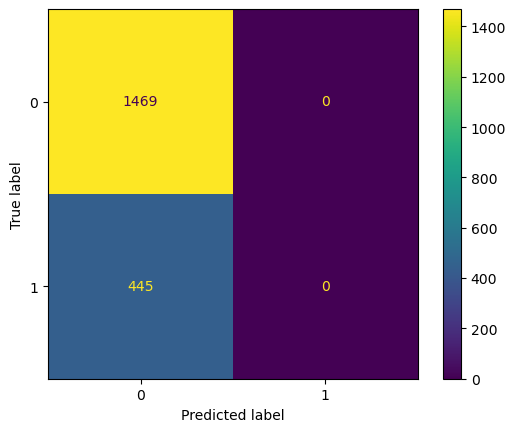

In [3]:
#Import the os library to use file and folder methods
import os

# view the current working directory
os.getcwd()

from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import metrics

file_path = r'C:\Users\jason\OneDrive\Documents\MBAD 6211 LAST SEMESTER\bankchurn.csv'
data = pd.read_csv(file_path)

data_nonull = data.dropna()
data_nonull.info()

data_nonull = data_nonull.drop(["customer_id"], axis = 1)
data_nonull.head()

data_nonull = pd.get_dummies(data_nonull, dtype = int)
data_nonull

# SVM - Fine tuning with GridSearchCV
# using datetime to time the fine tuning process
from datetime import datetime
print("Start search time:", datetime.now())

# find the best parameters 
from sklearn.model_selection import GridSearchCV

# make y (dependent variable) as np.array
y = np.array(data_nonull["churn"])

# make x a dataframe subset with independent variables
x = data_nonull.drop("churn", axis=1)

# Assuming X_train, y_train, X_test, y_test are defined elsewhere in the notebook
# split the dataset into training and testing
# since random sampling is used, set the random seed to a fixed value
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 44)

# SVM -- Tunning parameters 
param = {
    'C':[0.1, 1, 5],
    'gamma': [0.5, 0.75, 1 ], # 1/n_features
    'kernel': ['rbf', 'linear'] 
}

SVM = SVC()

# search parameters: cv=cross validation blocks; verbose=higher value show more steps
# n_jobs=-1 uses all available CPU cores; 
grid = GridSearchCV(estimator=SVM, 
                    param_grid=param,
                    scoring="accuracy",
                    verbose=1, cv=3)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

print("Best estimator:", grid.best_estimator_)

# end grid search
print("End search time:", datetime.now())

# confusion matrix 

final_model_svm = grid.best_estimator_

y_pred = final_model_svm.predict(X_test)

# get accuracy and confusion matrix
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_test,y_pred) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show() # display all open figures